I have augmented the images that I will be classifying.  I created a function to resize, grayscale, and normalize the pixel values of each image.  Then I created a dataframe combining the images with their labels.  This uncovered the fact that about 9,000 of the 50,000 images were mislabeled.  The jpg name of the image could not find a partner jpg name in the labels csv provided. (This raises the question of whether a clustering algorithm could be useful for the unlabeled data.)

Using the reduced data set, I split the data into stratified test and validation sets and saved them to disk as numpy arrays. The data started as a 37 GB file of JPGs, which I reduced to just over 11 Gbs by turning them to numpy arrays. Howver, I still had RAM issues on my local machine of only 16 Gb RAM. I could load the data but would run out of memory when trying to manipulate it. I solved this by using Google Colab Pro, which provides me with 25 GB of RAM.  This is still not enough to manipulate the data as much as I would like, but I have been working around it by making one change and saving it, then uploading that data to a new notebook with a fresh 25 GB to start.  My final training data is about 9 GB in size.  I may need to augment the images further through rotations and/or larger sizes to get more detail, but that will require even more RAM so I will start with the 9GB set.

I have created a base model with 94% training accuracy but only 67% validation accuracy.  The model is overfitting, but it gives me a starting point.

Changing leaky Relu to Relu improved validation accuracy to 70%

Dense layer neurons from 3,000 to 300 reduced validation accuracy to 69%

Reducing layers from 3 to 2 convolutional and pooling reduced validation accuracy to 65%

Adding one additional convolutional layer of 256 and pooling layer increased validation accuracy to 74%

Adding another additional convolutional layer of 512 and a pooling layer increased validation accuracy to 76%

Another convolutional layer of 1024 did not improve accuracy

Adding Dropout layers improved accuracy to 79%

Dropout layers and increased last 2 pooling filter size to 3X3 increased accuracy to 81%

Adding one more convolutional layer 800 neurons with pooling size 2X2 and 0.40 Dropout increased accuracy to 84% 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
import tensorflow as tf
from tensorflow import keras

In [5]:
X_train=np.load('drive/MyDrive/X_train_strat.npy')

In [6]:
y_train=np.load('drive/MyDrive/y_train_strat.npy')

In [7]:
X_val=np.load('drive/MyDrive/X_val_strat.npy')

In [2]:
y_val=np.load('drive/MyDrive/y_val_strat.npy')

In [ ]:
X_train.shape, y_train.shape

((33089, 150, 200), (33089, 28))

In [ ]:
## Baseline Model

# from tensorflow.keras import layers
# from keras.models import Sequential,Input,Model
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers.advanced_activations import LeakyReLU

# model = keras.models.Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(150,200,1),padding='same'))
# model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPooling2D((2, 2),padding='same'))
# model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
# model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
# model.add(LeakyReLU(alpha=0.1))                  
# model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# model.add(Flatten())
# model.add(Dense(3000, activation='linear'))
# model.add(LeakyReLU(alpha=0.1))                  
# model.add(Dense(28, activation='softmax'))

In [ ]:
## model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
## model.fit(X_train, y_train,batch_size=30, epochs=5)

Epoch 1/5
1103/1103 [==============================] - 56s 39ms/step - loss: 1.4638 - accuracy: 0.5738
Epoch 2/5
1103/1103 [==============================] - 43s 39ms/step - loss: 0.9173 - accuracy: 0.7120
Epoch 3/5
1103/1103 [==============================] - 44s 39ms/step - loss: 0.5395 - accuracy: 0.8241
Epoch 4/5
1103/1103 [==============================] - 43s 39ms/step - loss: 0.2643 - accuracy: 0.9122
Epoch 5/5
1103/1103 [==============================] - 43s 39ms/step - loss: 0.1778 - accuracy: 0.9439


In [ ]:
##model.evaluate(X_val,y_val)

259/259 [==============================] - 3s 11ms/step - loss: 1.8553 - accuracy: 0.6786


[1.855276346206665, 0.6785930395126343]

###### Baseline model not stratified.  Training accuracy 0.95   evaluation accuracy 0.65
##### Stratified Baseline model       Training accuracy 0.94   evaluation accuracy 0.67
##### Stratified Relu, not leaky relu Training accuracy 0.96   evaluation accuracy 0.70

### Model2

In [ ]:
from tensorflow.keras import layers
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model2 = keras.models.Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(150,200,1),padding='same'))
model2.add(MaxPooling2D((2, 2),padding='same'))
model2.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model2.add(Conv2D(128, (3, 3), activation='relu',padding='same'))                 
model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model2.add(Conv2D(256, (3, 3), activation='relu',padding='same'))                 
model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model2.add(Conv2D(512, (3, 3), activation='relu',padding='same'))                 
model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model2.add(Flatten())
model2.add(Dense(300, activation='relu'))               
model2.add(Dense(28, activation='softmax'))

In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model2.fit(X_train, y_train,batch_size=30, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
1103/1103 [==============================] - 52s 32ms/step - loss: 1.5105 - accuracy: 0.5450 - val_loss: 1.0704 - val_accuracy: 0.6762
Epoch 2/5
1103/1103 [==============================] - 27s 25ms/step - loss: 0.9374 - accuracy: 0.7092 - val_loss: 0.9054 - val_accuracy: 0.7127
Epoch 3/5
1103/1103 [==============================] - 27s 25ms/step - loss: 0.7242 - accuracy: 0.7716 - val_loss: 0.8112 - val_accuracy: 0.7469
Epoch 4/5
1103/1103 [==============================] - 27s 25ms/step - loss: 0.5629 - accuracy: 0.8173 - val_loss: 0.7328 - val_accuracy: 0.7787
Epoch 5/5
1103/1103 [==============================] - 29s 27ms/step - loss: 0.4159 - accuracy: 0.8640 - val_loss: 0.7917 - val_accuracy: 0.7725


In [ ]:
## save model with 78% val accuracy
model2.save('drive/MyDrive/CNN5Conv78Accuracy')

INFO:tensorflow:Assets written to: drive/MyDrive/CNN5Conv78Accuracy/assets


In [8]:
test=keras.models.load_model('drive/MyDrive/CNN5Conv78Accuracy')

In [19]:
predict_y=test.predict(X_val)
y_preds=np.argmax(predict_y, axis=1)

# y_preds_hot=[]
# for each in predict_y:
#   elem=[]
#   for i in each:
#     if i == each.max():
#       r=1.
#     else:
#       r=0.
#     elem.append(r)
#   y_preds_hot.append(asarray(elem))


In [20]:
# y_hot=asarray(y_preds_hot)

In [28]:
y_val_1d=np.argmax(y_val, axis=1)
y_val_1d[2]

2

In [27]:
# y_hot[2], y_val[2], 
print(y_hot.shape)
print(y_val.shape)
print(y_preds[2])

(8273, 28)
(8273, 28)
8


In [29]:
confusion=tf.math.confusion_matrix(labels=y_val_1d, predictions=y_preds)

In [30]:
print(confusion)

tf.Tensor(
[[1151   17   12    0    0    0    0    0    0    0    0    0    4   17
     0    0    0    0    0    0    0    0    0    0    3    2    0    1]
 [  21  731    3    0    0    0    0    0    3    3    0    0    1   20
     0    0    0    0    0    0    0    0    0    0    0    1    0    0]
 [  10    8 1415    0    1    7    3    9  131    7    0    0    3   48
    10    0   13   18    0    5    0    1    1    4    0   38    5    3]
 [   0    0    4   12    0    0    0    0    1    2    0    0    0    1
     3    0    1    1    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    7    0    0    0    3    0    0    0    0    4
     0    0    0    0    0    1    0    0    0    0    0    0    0    0]
 [   0    0   18    0    0   13    1    0    8    0    0    0    0    4
     1    0    1    1    0    0    0    0    1    0    0    9    0    0]
 [   2    2   10    0    0    0   20    0    0    2    0    0    0    9
     1    0    0    7    0    0    0    0    0 

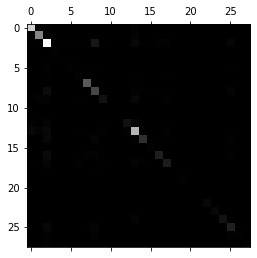

In [31]:
plt.matshow(confusion, cmap=plt.cm.gray)

### Model3

In [ ]:
from tensorflow.keras import layers
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model3 = keras.models.Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(150,200,1),padding='same'))
model3.add(MaxPooling2D((2, 2),padding='same'))
model3.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model3.add(Dropout(0.28))
model3.add(Conv2D(128, (3, 3), activation='relu',padding='same'))                 
model3.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model3.add(Dropout(0.35))
model3.add(Conv2D(256, (3, 3), activation='relu',padding='same'))                 
model3.add(MaxPooling2D(pool_size=(3, 3),padding='same'))
model3.add(Dropout(0.40))
model3.add(Conv2D(512, (3, 3), activation='relu',padding='same'))                 
model3.add(MaxPooling2D(pool_size=(3, 3),padding='same'))
model3.add(Dropout(0.40))
model3.add(Flatten())
model3.add(Dense(600, activation='relu'))               
model3.add(Dense(28, activation='softmax'))

In [ ]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#model3.fit(X_train, y_train,batch_size=50, epochs=25, validation_data=(X_val, y_val))

In [ ]:
model3.save('drive/MyDrive/CNN5Conv4Drop3X3pool_81%Acc')

INFO:tensorflow:Assets written to: drive/MyDrive/CNN5Conv4Drop3X3pool_81%Acc/assets


### Model4

In [ ]:
from tensorflow.keras import layers
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model4 = keras.models.Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(150,200,1),padding='same'))
model4.add(MaxPooling2D((2, 2),padding='same'))
model4.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model4.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model4.add(Dropout(0.28))
model4.add(Conv2D(128, (3, 3), activation='relu',padding='same'))                 
model4.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model4.add(Dropout(0.35))
model4.add(Conv2D(256, (3, 3), activation='relu',padding='same'))                 
model4.add(MaxPooling2D(pool_size=(3, 3),padding='same'))
model4.add(Dropout(0.40))
model4.add(Conv2D(512, (3, 3), activation='relu',padding='same'))                 
model4.add(MaxPooling2D(pool_size=(3, 3),padding='same'))
model4.add(Dropout(0.40))
model4.add(Conv2D(800, (3, 3), activation='relu',padding='same'))                 
model4.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model4.add(Dropout(0.40))
model4.add(Flatten())
model4.add(Dense(600, activation='relu'))               
model4.add(Dense(28, activation='softmax'))

In [ ]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model4.fit(X_train, y_train,batch_size=80, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
414/414 [==============================] - 27s 65ms/step - loss: 0.3704 - accuracy: 0.8771 - val_loss: 0.5870 - val_accuracy: 0.8296
Epoch 2/5
414/414 [==============================] - 25s 60ms/step - loss: 0.3764 - accuracy: 0.8758 - val_loss: 0.6163 - val_accuracy: 0.8210
Epoch 3/5
414/414 [==============================] - 25s 60ms/step - loss: 0.3744 - accuracy: 0.8774 - val_loss: 0.6220 - val_accuracy: 0.8131
Epoch 4/5
414/414 [==============================] - 25s 60ms/step - loss: 0.3735 - accuracy: 0.8784 - val_loss: 0.5405 - val_accuracy: 0.8450
Epoch 5/5
414/414 [==============================] - 25s 60ms/step - loss: 0.3640 - accuracy: 0.8804 - val_loss: 0.5906 - val_accuracy: 0.8285


In [ ]:
model4.save('drive/MyDrive/CNN6Conv5Drop3X3pool_84%ValAcc88%train')

INFO:tensorflow:Assets written to: drive/MyDrive/CNN6Conv5Drop3X3pool_84%ValAcc88%train/assets


### AlexNet Inspired
##### possibly overcomplicated. Maybe more useful for identifying individuals

In [ ]:
from tensorflow.keras import layers
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
modelA = keras.models.Sequential()
modelA.add(Conv2D(96, kernel_size=(9, 9), strides=(3, 3), activation='relu',input_shape=(150,200,1),padding='same'))
modelA.add(MaxPooling2D((3, 3),padding='same'))
modelA.add(Dropout(0.20))
modelA.add(Conv2D(256, kernel_size=(4, 4), strides=(2,2), activation='relu', padding='same'))
modelA.add(MaxPooling2D((3, 3),padding='same'))
modelA.add(Dropout(0.35))
modelA.add(Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
modelA.add(Dropout(.45))
modelA.add(Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
modelA.add(MaxPooling2D((2,2), padding='same'))
modelA.add(Flatten())
modelA.add(Dense(168, activation='relu'))               
modelA.add(Dense(28, activation='softmax'))


In [ ]:
modelA.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
modelA.fit(X_train, y_train,batch_size=80, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
414/414 [==============================] - 38s 46ms/step - loss: 2.0749 - accuracy: 0.3780 - val_loss: 1.6158 - val_accuracy: 0.4933
Epoch 2/20
414/414 [==============================] - 16s 40ms/step - loss: 1.4190 - accuracy: 0.5700 - val_loss: 1.2672 - val_accuracy: 0.6067
Epoch 3/20
414/414 [==============================] - 17s 41ms/step - loss: 1.2392 - accuracy: 0.6174 - val_loss: 1.1187 - val_accuracy: 0.6576
Epoch 4/20
414/414 [==============================] - 17s 40ms/step - loss: 1.1312 - accuracy: 0.6494 - val_loss: 1.1097 - val_accuracy: 0.6593
Epoch 5/20
414/414 [==============================] - 17s 40ms/step - loss: 1.0517 - accuracy: 0.6706 - val_loss: 1.0119 - val_accuracy: 0.6844
Epoch 6/20
414/414 [==============================] - 16s 40ms/step - loss: 0.9896 - accuracy: 0.6885 - val_loss: 1.0131 - val_accuracy: 0.6889
Epoch 7/20
414/414 [==============================] - 17s 40ms/step - loss: 0.9415 - accuracy: 0.7017 - val_loss: 0.8983 - val_accuracy: